# 统计与大数据分析软件第十二次作业

使用`iris`数据集绘制相关图像，首先加载数据：

In [1]:
# 加载数据
data(iris)

接下来查看一下数据情况：

In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


加载相应的处理和数据包，其中dplyr和tidyr是用于数据处理的包，ggplot2是用于数据可视化的包。

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




后面的第五第六幅图，我们需要把数据重组一下，让四个数据类别放在一起：

In [5]:
# 将数据转换为长格式
iris_long <- iris %>%
  pivot_longer(
    cols = c(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width),
    names_to = "Variable",
    values_to = "Value"
  )


In [6]:
head(iris_long)

Species,Variable,Value
<fct>,<chr>,<dbl>
setosa,Sepal.Length,5.1
setosa,Sepal.Width,3.5
setosa,Petal.Length,1.4
setosa,Petal.Width,0.2
setosa,Sepal.Length,4.9
setosa,Sepal.Width,3.0


## 图片一：密度图

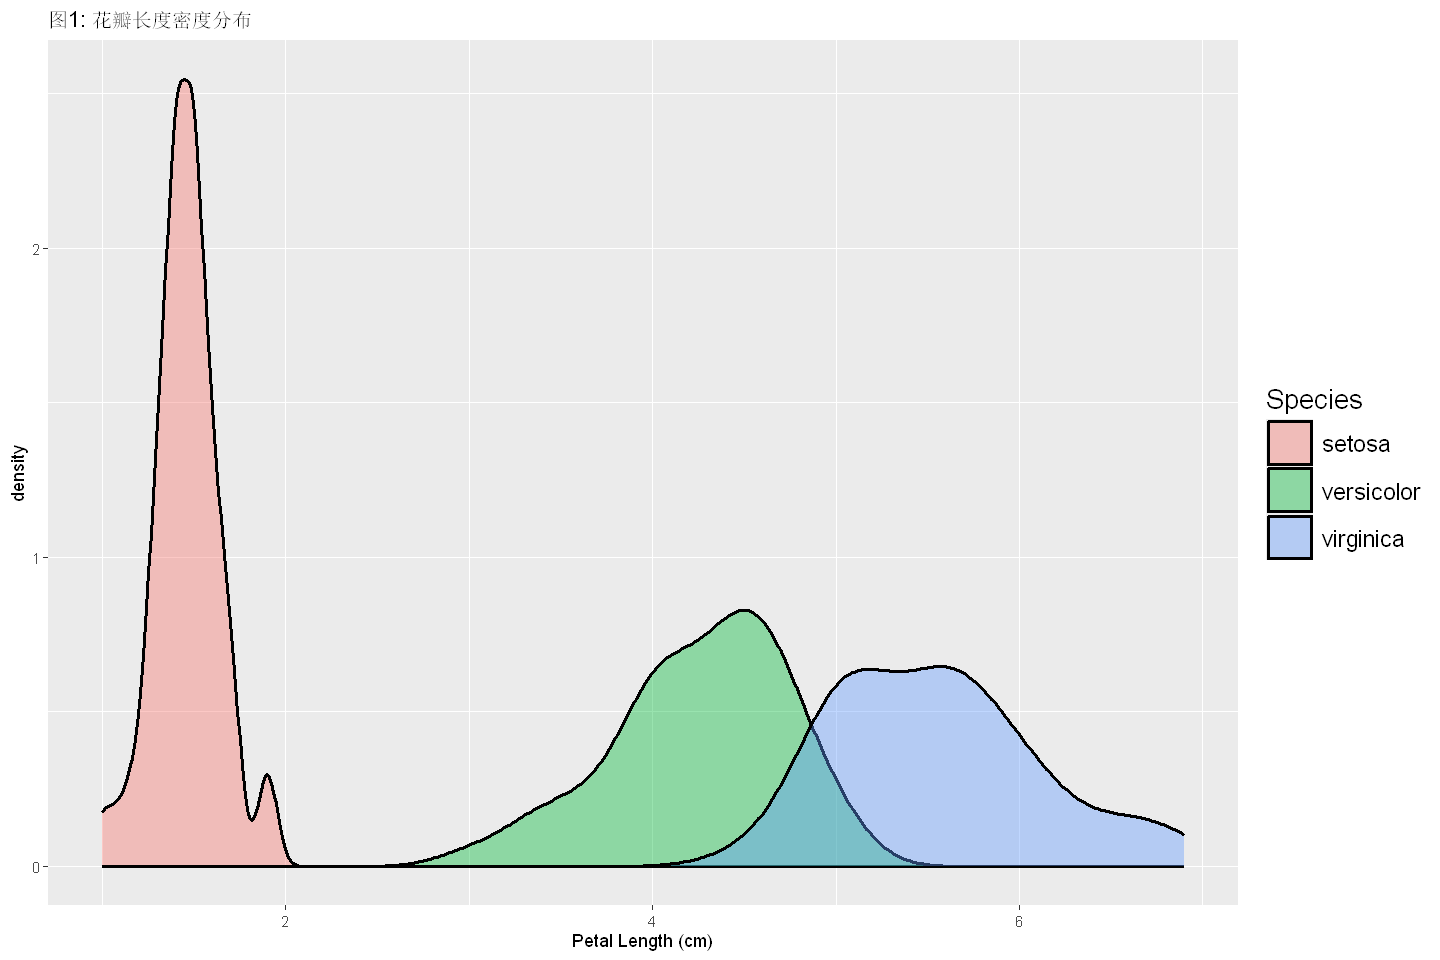

In [7]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(iris, aes(x = Petal.Length, fill = Species)) +
  geom_density(alpha = 0.4, color = "black", linewidth=1) +
  labs(title = "图1: 花瓣长度密度分布", x = "Petal Length (cm)") +
  theme(
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.key.size = unit(1, "cm")  # 调整图例图标大小
  )

## 图片二：直方图

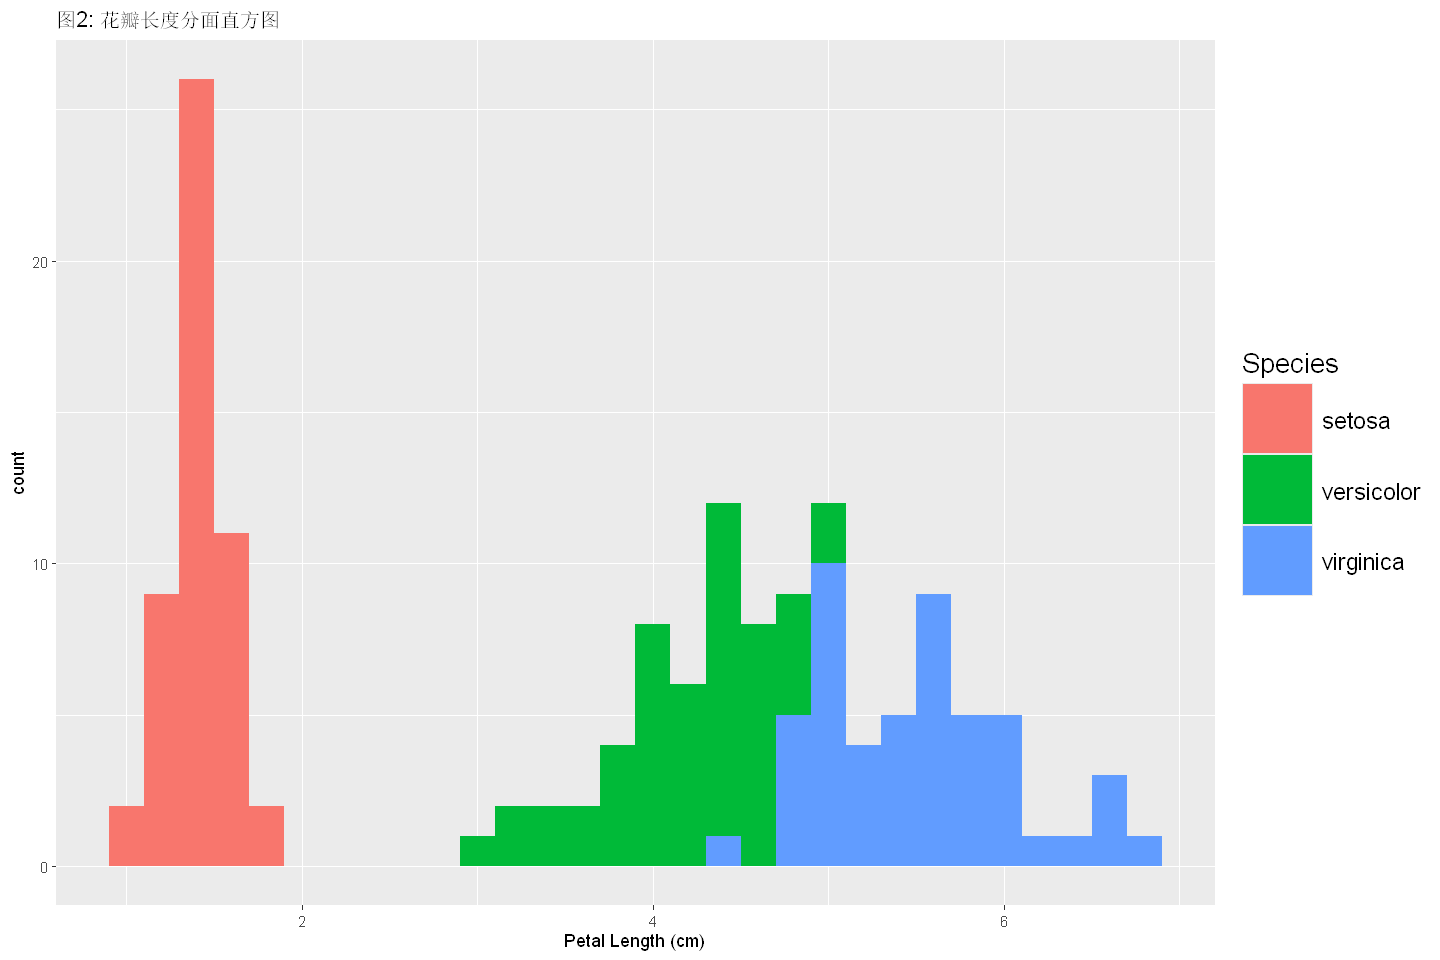

In [8]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(iris, aes(x = Petal.Length, fill = Species)) +
  geom_histogram(binwidth = 0.2) +
  labs(title = "图2: 花瓣长度分面直方图", x = "Petal Length (cm)") +
  theme(
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.key.size = unit(1.5, "cm")  # 调整图例图标大小
  )

## 第三题：箱线图

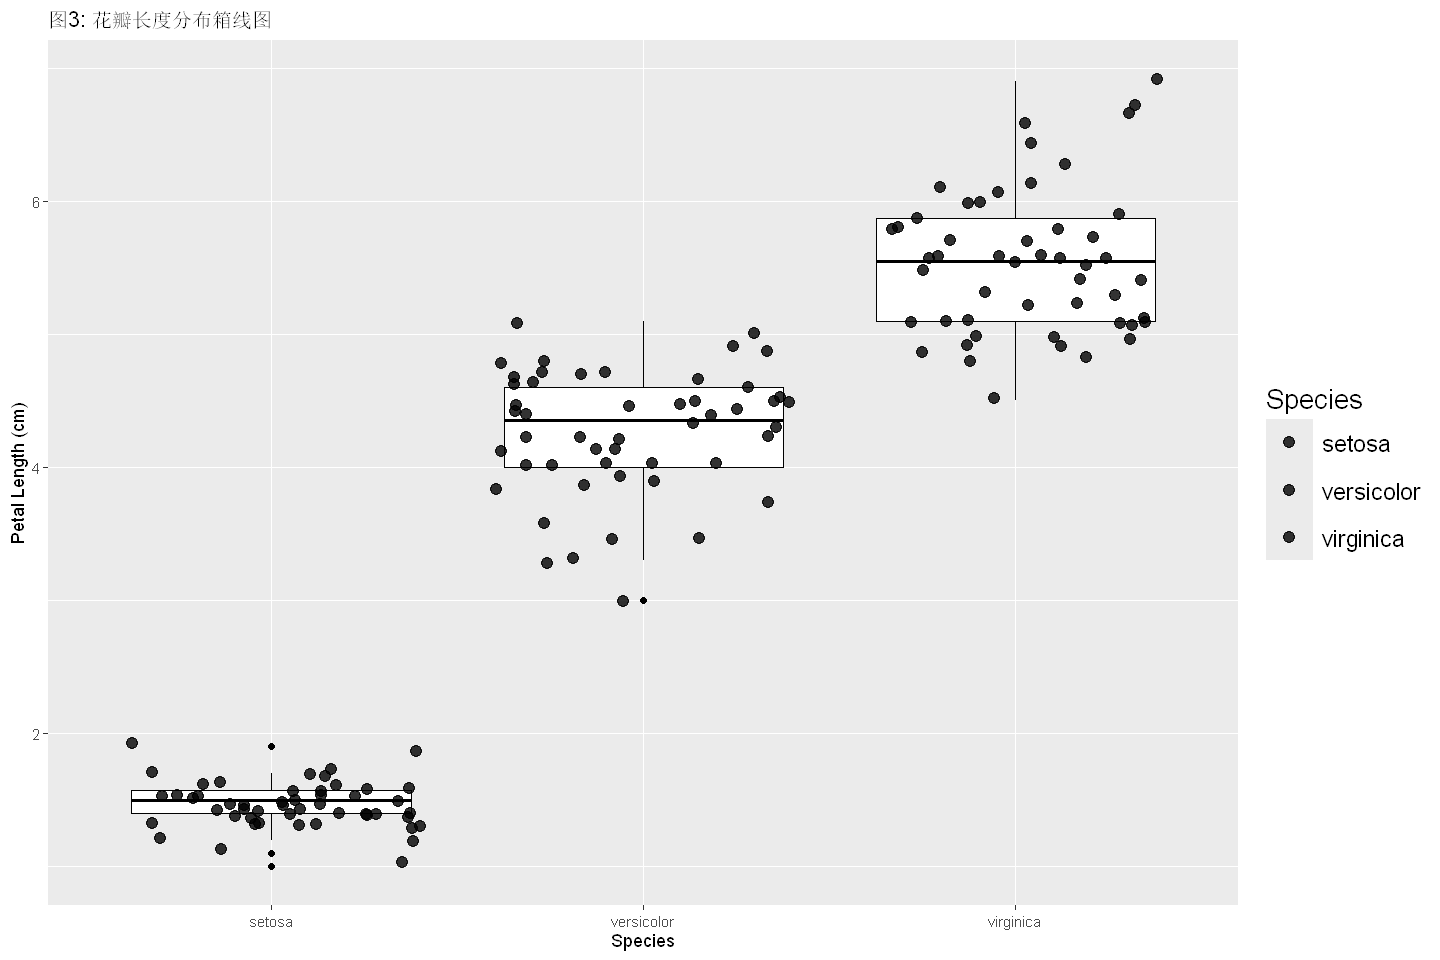

In [9]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(iris, aes(x = Species, y = Petal.Length, fill = Species)) +
  geom_boxplot(fill="white", color="black")+
  geom_point(position="jitter", color="black", alpha=.8, size=3) +
  labs(title = "图3: 花瓣长度分布箱线图", y = "Petal Length (cm)") +
  theme(
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.key.size = unit(1, "cm")  # 调整图例图标大小
  )


## 第四题：散点图

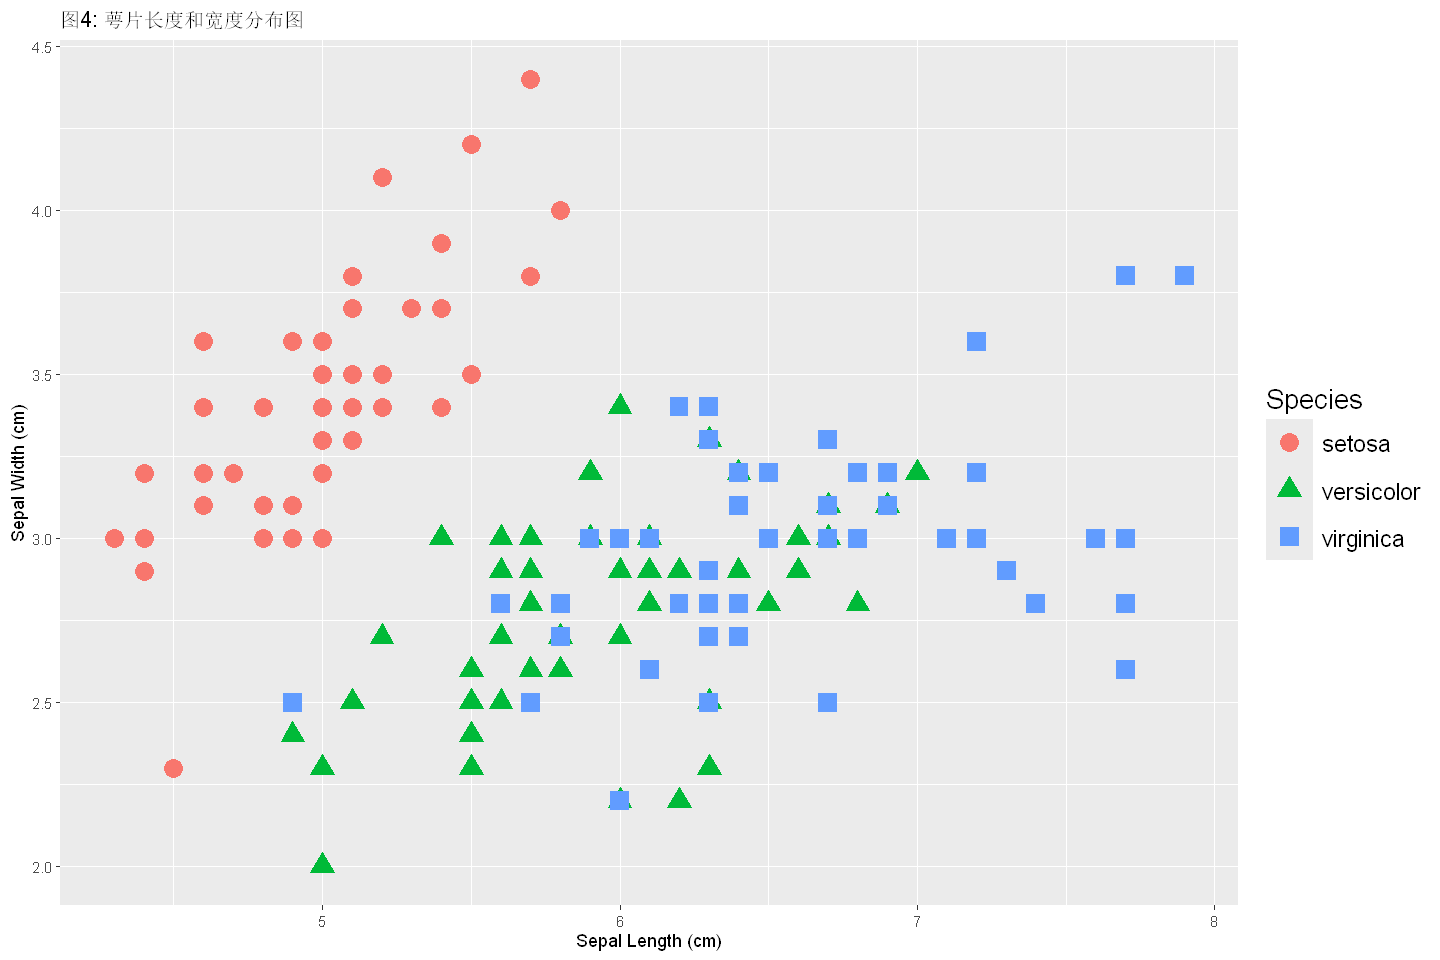

In [10]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species, shape=Species)) + 
  geom_point(size=5) +
  labs(title = "图4: 萼片长度和宽度分布图", x = "Sepal Length (cm)", y = "Sepal Width (cm)") +
  theme(
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.key.size = unit(1, "cm")  # 调整图例图标大小
  )

## 第五题：柱状图1

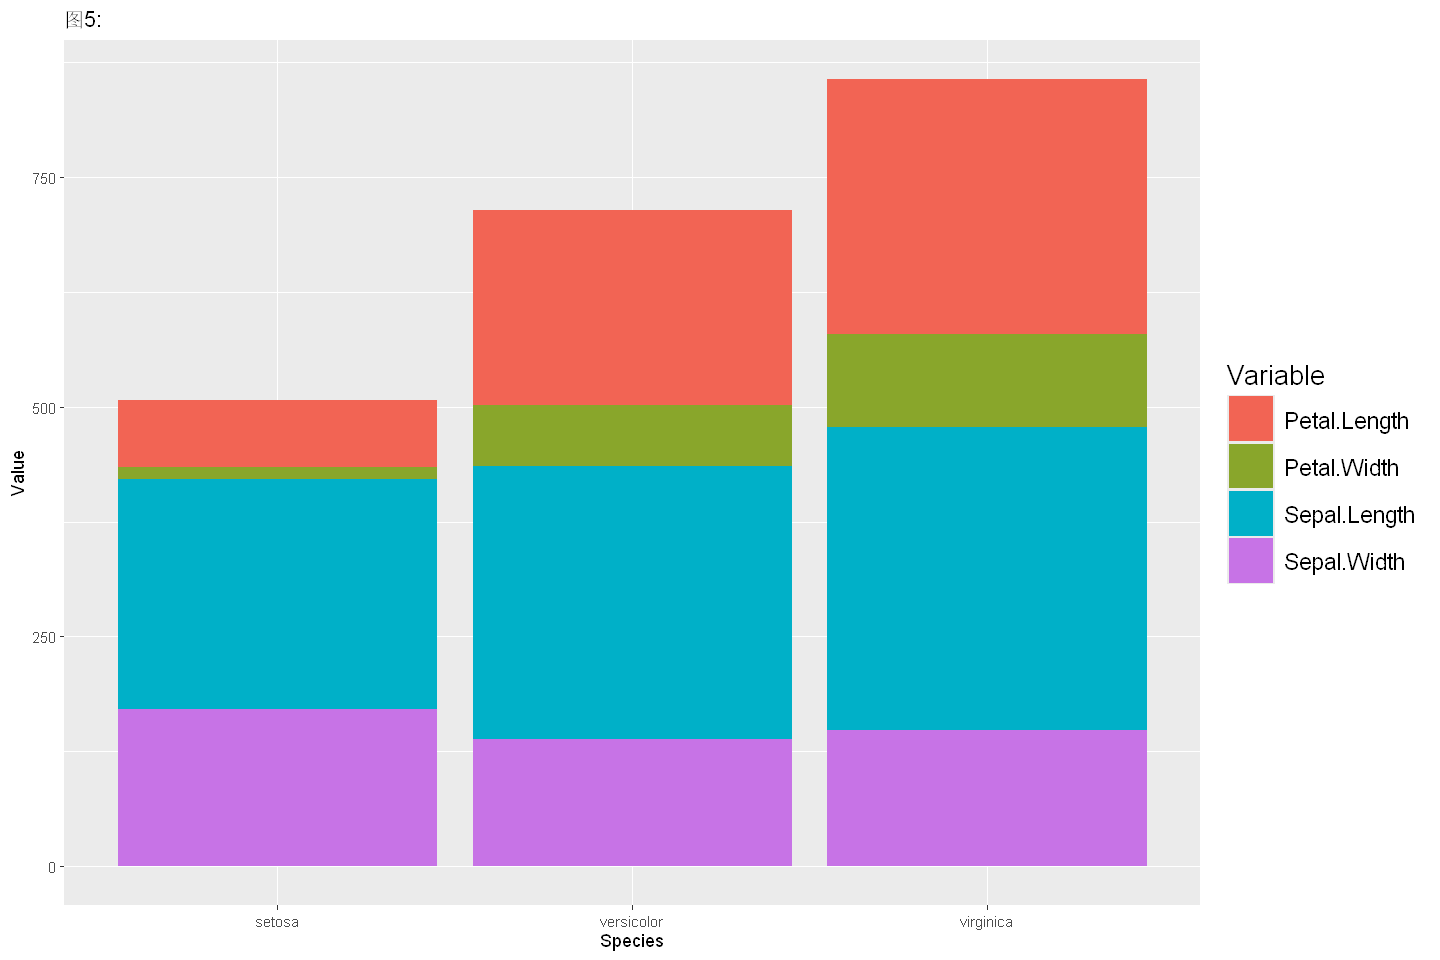

In [11]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(iris_long, aes(x = Species, y = Value, fill = Variable)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Petal.Length" = "#F26454",
                               "Petal.Width" = "#89A62B",
                               "Sepal.Length" = "#00B0C8",
                               "Sepal.Width" = "#C773E6")) +
  theme(
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.key.size = unit(1, "cm")  # 调整图例图标大小
  ) +
  labs(title = "图5: ", x = "Species", y = "Value", fill = "Variable")

## 第六题：柱状图2

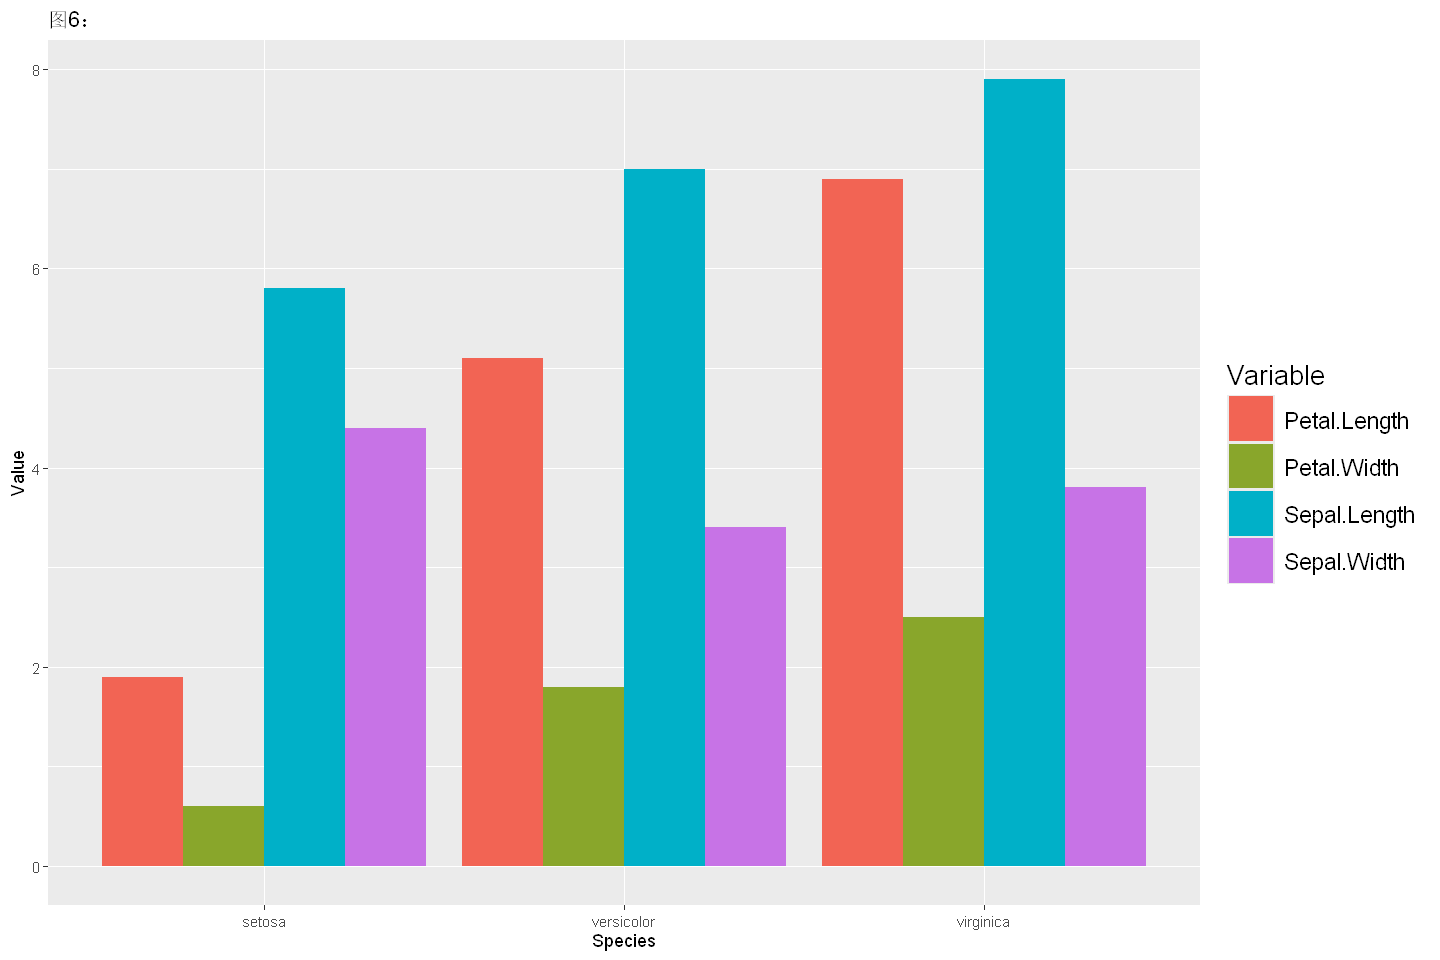

In [12]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(iris_long, aes(x = Species, y = Value, fill = Variable)) +
  geom_bar(stat = "identity", position="dodge") +
  scale_fill_manual(values = c("Petal.Length" = "#F26454",
                               "Petal.Width" = "#89A62B",
                               "Sepal.Length" = "#00B0C8",
                               "Sepal.Width" = "#C773E6")) +
  theme(
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.key.size = unit(1, "cm")  # 调整图例图标大小
  ) +
  labs(title = "图6：", x = "Species", y = "Value", fill = "Variable")

## 第七题：分区域散点图

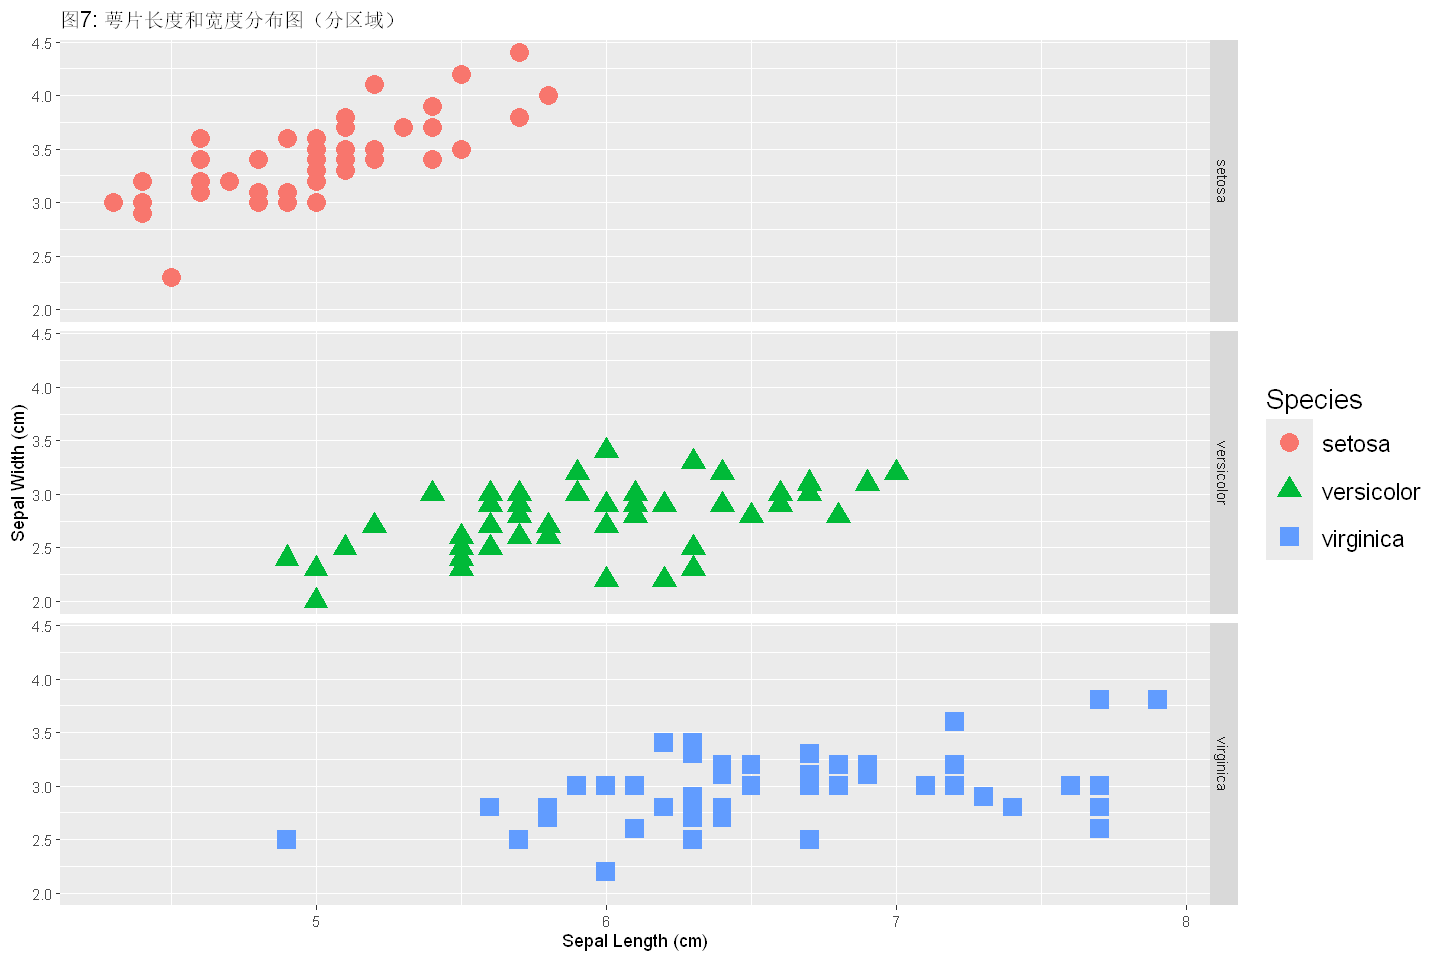

In [13]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species, shape=Species)) +
  geom_point(size=5) +
  facet_grid(Species~.)+
  labs(title = "图7: 萼片长度和宽度分布图（分区域）", x = "Sepal Length (cm)", y = "Sepal Width (cm)") +
  theme(
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.key.size = unit(1, "cm")  # 调整图例图标大小   
  )